In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
from utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
iris_stats = gp.read_file("data/out/iris-stats.gpkg")

In [7]:
# Le score de l'extreme droite, comprenent RN + R!
iris_stats["score_ED"] = iris_stats.score_RECONQUETE + iris_stats.score_RN

<Axes: xlabel='pct_etrangers', ylabel='score_RN'>

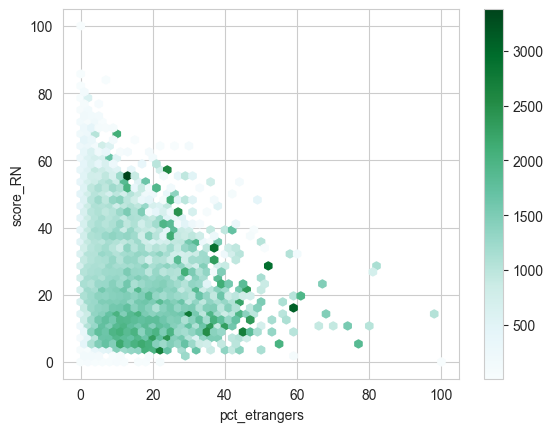

In [8]:
iris_stats.plot.hexbin(
    x="pct_etrangers", 
    y="score_RN",
    C="inscrits",
    gridsize=50)

In [56]:
def score_ed(df) :
    """Calcule un score d'extreme droite moyen pour un ensemble d'iris"""
    return (df["score_ED"] * df.votants).sum() / df.votants.sum()

In [63]:
pcts = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
mins = []
maxs = []
means = []
for ipct in range(0, len(pcts)-1): 
    pct = pcts[ipct]
    next_pct = pcts[ipct+1]
    filtered_df = iris_stats[iris_stats.pct_etrangers.between(pct, next_pct)]
    mins.append(filtered_df.score_ED.quantile(0.05))
    maxs.append(filtered_df.score_ED.quantile(0.95))
    means.append(score_ed(filtered_df))
pcts = pcts[0:-1]

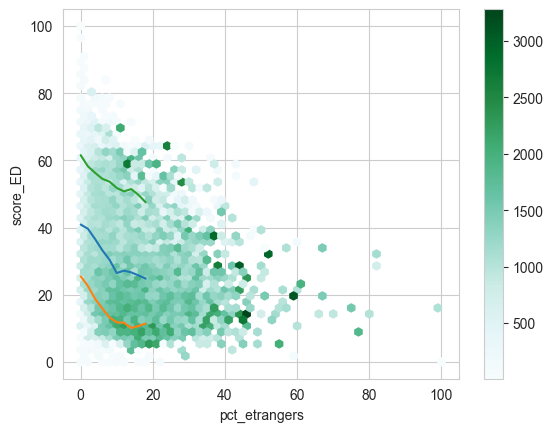

In [64]:
iris_stats.plot.hexbin(
    x="pct_etrangers", 
    y="score_ED",
    C="inscrits",
    gridsize=50)
plt.plot(pcts, means)
plt.plot(pcts, mins)
plt.plot(pcts, maxs)

Text(0.5, 1.0, "Score extrême droite aux élections européennes vs % d'étrangers")

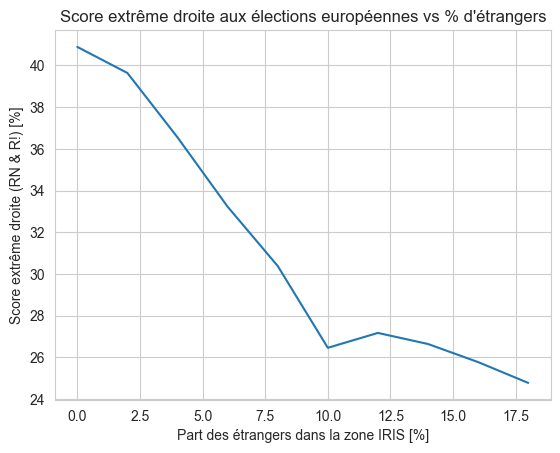

In [78]:
plt.plot(pcts, means)
plt.xlabel("Part des étrangers dans la zone IRIS [%]")
plt.ylabel("Score extrême droite (RN & R!) [%]")
plt.title("Score extrême droite aux élections européennes vs % d'étrangers")
#plt.ylim([0, 45])

## Score de l'extrème droite aux Europénnes 2024, vs part des étrangers dans la population

Le graphe ci dessus représente le score de l'extrème droite (RN + Reconquête), aux élections Européennes de 2024 en France, par zone IRIS (découpage INSEE de 2000 à 5000 habitants).

En moyenne, moins les citoyens cotoient des étrangers dans leur quotidien, plus ils votent extrème droite.



In [24]:
iris_stats.columns

Index(['index', 'nom_commune', 'inscrits', 'votants', 'pct_abstention',
       'score_blanc', 'score_nul', 'score_RN', 'score_LREM', 'score_LFI',
       'score_PCF', 'score_LR', 'score_EELV', 'score_PS', 'score_AR',
       'score_RECONQUETE', 'pop_totale', 'pct_0_19', 'pct_20_64',
       'pct_65_plus', 'pct_etrangers', 'pct_immigres', 'age_moyen',
       'pct_csp_agriculteur', 'pct_csp_independant', 'pct_csp_plus',
       'pct_csp_intermediaire', 'pct_csp_employe', 'pct_csp_ouvrier',
       'pct_csp_retraite', 'pct_csp_sans_emploi', 'geometry', 'score_ED'],
      dtype='object')

## Histograme de la population, en fonction du pct d'étrangers

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

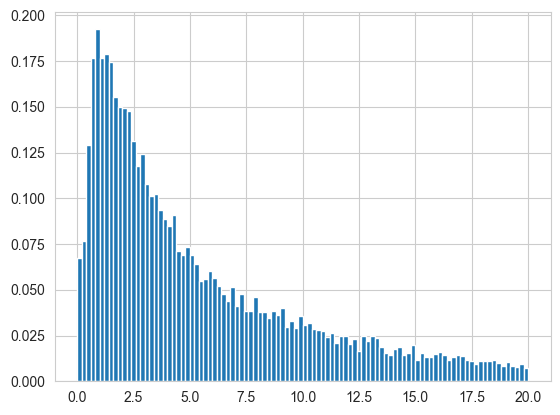

In [29]:
plt.hist(
    iris_stats.pct_etrangers,
    weights=iris_stats.pop_totale,
    range=(0, 20),
    normed=True,
    density=True, 
    bins=100)

## Score par bloc

In [44]:
def weighted_mean(df, col) :
    return (df[col] * df.votants).sum() / df.votants.sum()

In [47]:
weighted_mean(iris_stats[iris_stats.pct_etrangers.between(0, 1)], "score_ED")

41.979424207420266

In [49]:
weighted_mean(iris_stats[iris_stats.pct_etrangers > 10], "score_ED")

25.813895818462875